In [39]:
#Xsqcoil - Lay out square coils as a series - These have flat sides together
#CKH June 12 2018 
import numpy as np
#Compare this to a simple spiral of same size and inter-wire spacing. 

In [40]:
g=0.6*np.sqrt(2.0) #Grid spacing in mm. Minimum is 0.1mm for Brother PE770 and PE525 machines. But wire is 0.1 mm dia
#Making everything in multiples of g= 0.2, 0.4, 0.6 mm leads to nice grids without stabbing
Sidelength=18*g #Square side length in mm
CenterHoleWidth=g#Width of center hole in mm
stitchlength=4*g #Maximum stitchlength in mm
#set N based on this information
#N=np.floor(Sidelength/stitchlength)#Max number of stitches per 

In [41]:
Rectanglex0=[CenterHoleWidth/2,CenterHoleWidth/2,-CenterHoleWidth/2,-CenterHoleWidth/2]
Rectangley0=[-Sidelength/2,Sidelength/2,Sidelength/2,-Sidelength/2+g]
Rectanglex=[]
Rectangley=[]
for i in range(int((Sidelength-CenterHoleWidth)/2/g)+1):
    rx0=Rectanglex0[0]+i*g  #Corners of rectangular spiral pattern
    rx1=Rectanglex0[1]+i*g
    rx2=Rectanglex0[2]-i*g
    rx3=Rectanglex0[3]-i*g
    ry0=Rectangley0[0]+i*g
    ry1=Rectangley0[1]-i*g
    ry2=Rectangley0[2]-i*g
    ry3=Rectangley0[3]+i*g
    
    ry01stitch=np.arange(ry0,ry1,stitchlength)    
    rx12stitch=np.arange(rx1,rx2,-stitchlength)
    ry23stitch=np.arange(ry2,ry3,-stitchlength)
    rx34stitch=np.arange(rx3,rx1,stitchlength)
 
    ry01stitch[1:]=ry01stitch[1:]-g/2 #See that stitches don't intersect
    rx12stitch[1:]=rx12stitch[1:]+g/2 #
    ry23stitch[1:]=ry23stitch[1:]+g/2 #Stitches don't intersect
    rx34stitch[1:]=rx34stitch[1:]-g/2 #

    rx01stitch=rx0*np.ones(len(ry01stitch))
    ry12stitch=ry1*np.ones(len(rx12stitch))
    rx23stitch=rx2*np.ones(len(ry23stitch))
    ry34stitch=ry3*np.ones(len(rx34stitch))    
    
    Rectanglex=np.append(Rectanglex,rx01stitch)
    Rectanglex=np.append(Rectanglex,rx12stitch)
    Rectanglex=np.append(Rectanglex,rx23stitch)
    Rectanglex=np.append(Rectanglex,rx34stitch)
    Rectangley=np.append(Rectangley,ry01stitch)
    Rectangley=np.append(Rectangley,ry12stitch)
    Rectangley=np.append(Rectangley,ry23stitch)
    Rectangley=np.append(Rectangley,ry34stitch)
    
Xcoilx=np.append(Rectanglex,Rectanglex[-1]+2.5*g)
Xcoily=np.append(Rectangley,Rectangley[-1])


104

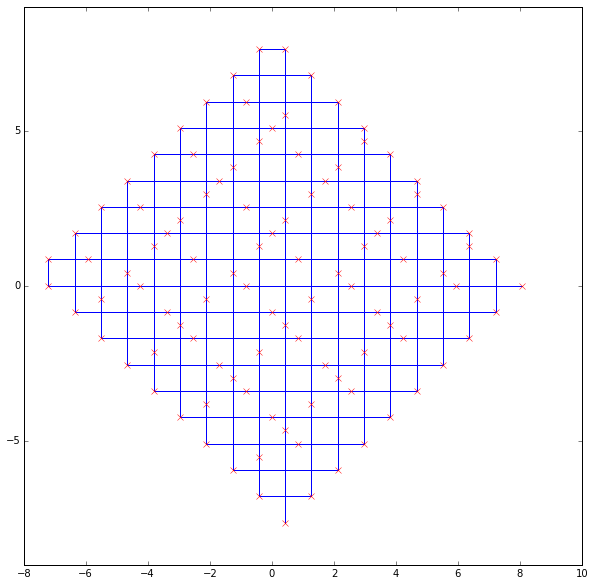

In [42]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(Xcoilx,Xcoily)
plt.axis('equal')
plt.hold('true')
plt.plot(Xcoilx,Xcoily,'rx')
len(Xcoilx)

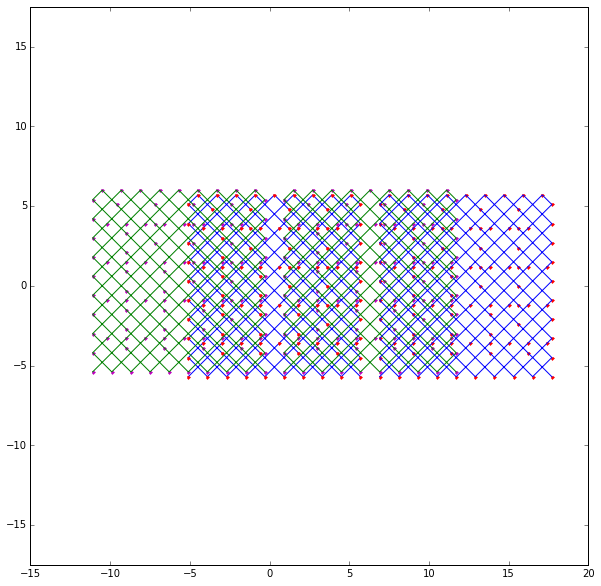

In [43]:
#Rotate it 45 degrees to be a square sitting on its edge
XSqx=(Xcoilx+Xcoily)/np.sqrt(2)
XSqy=(Xcoily-Xcoilx)/np.sqrt(2)
plt.figure(figsize=(10,10))
plt.plot(XSqx,XSqy)
plt.axis('equal')
plt.hold('true')
plt.plot(XSqx,XSqy,'r.')
plt.plot(XSqx+(Sidelength/2)/np.sqrt(2)+g/np.sqrt(2),XSqy+g/2/np.sqrt(2),'m.')
plt.plot(XSqx+(Sidelength/2)/np.sqrt(2)+g/np.sqrt(2),XSqy+g/2/np.sqrt(2),'g')
plt.plot(XSqx-(Sidelength/2)/np.sqrt(2)-g/np.sqrt(2),XSqy+g/2/np.sqrt(2),'m.')
plt.plot(XSqx-(Sidelength/2)/np.sqrt(2)-g/np.sqrt(2),XSqy+g/2/np.sqrt(2),'g')
plt.plot(XSqx+2*(Sidelength/2)/np.sqrt(2)+2*g/np.sqrt(2),XSqy,'r.')
plt.plot(XSqx+2*(Sidelength/2)/np.sqrt(2)+2*g/np.sqrt(2),XSqy,'b')
#Check if the red dots (needle punches) hit any of the previously-installed wires

In [44]:
XsqWidth=np.max(XSqx)-np.min(XSqx)
XsqHeight=np.max(XSqy)-np.min(XSqy)
XSqx=XSqx-(np.max(XSqx)+np.min(XSqx))/2 #center it
XSqy=XSqy-(np.max(XSqy)+np.min(XSqy))/2

Joinery= np.arange(np.min(XSqy),np.max(XSqy),stitchlength)
Joinerx= np.ones(len(Joinery))*(np.max(XSqx)+g/np.sqrt(2)/2)

Squarewidth=np.max(XSqx)-np.min(XSqx)
np.max(XSqx), len(Joinery)



(5.3999999999999995, 4)

(216, 216)

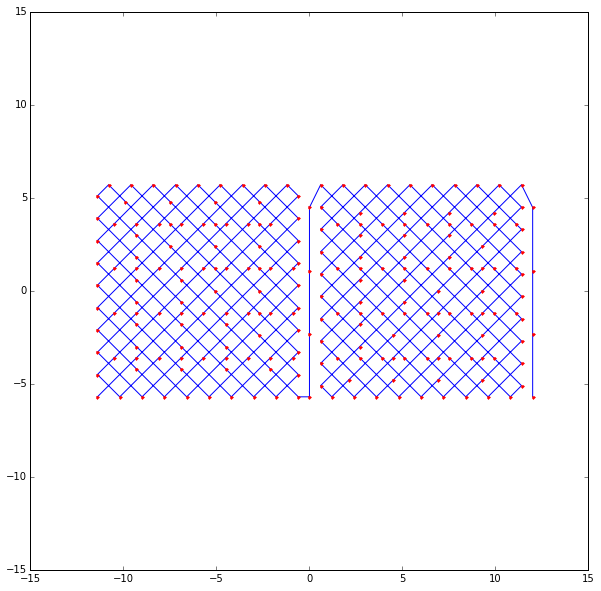

In [45]:
#XsqPairx=np.append(XSqx-XsqWidth/2-g/2,Joinerx-XsqWidth/2-g/2)
HalfSpacing=((Sidelength/2)/np.sqrt(2)+g/np.sqrt(2))
XsqPairx=np.append(XSqx-HalfSpacing,Joinerx-HalfSpacing+g/np.sqrt(2)/2)
XsqPairx=np.append(XsqPairx,XSqx+HalfSpacing)
XsqPairy=np.append(XSqy,Joinery)
XsqPairy=np.append(XsqPairy,-XSqy)
XsqPairx=np.append(XsqPairx,Joinerx+HalfSpacing+g/np.sqrt(2)/2)
XsqPairy=np.append(XsqPairy,Joinery[::-1])
plt.figure(figsize=(10,10))
plt.plot(XsqPairx,XsqPairy)
plt.axis('equal')
plt.hold('true')
plt.plot(XsqPairx,XsqPairy,'r.')
#plt.plot(XsqPairx+Squarewidth/2,XsqPairy+g/2/np.sqrt(2),'g')
#plt.plot(XsqPairx+Squarewidth/2,XsqPairy+g/2/np.sqrt(2),'m.')
plt.savefig('coilpair.svg')
len(XsqPairx),len(XsqPairy)

11.924999999999997

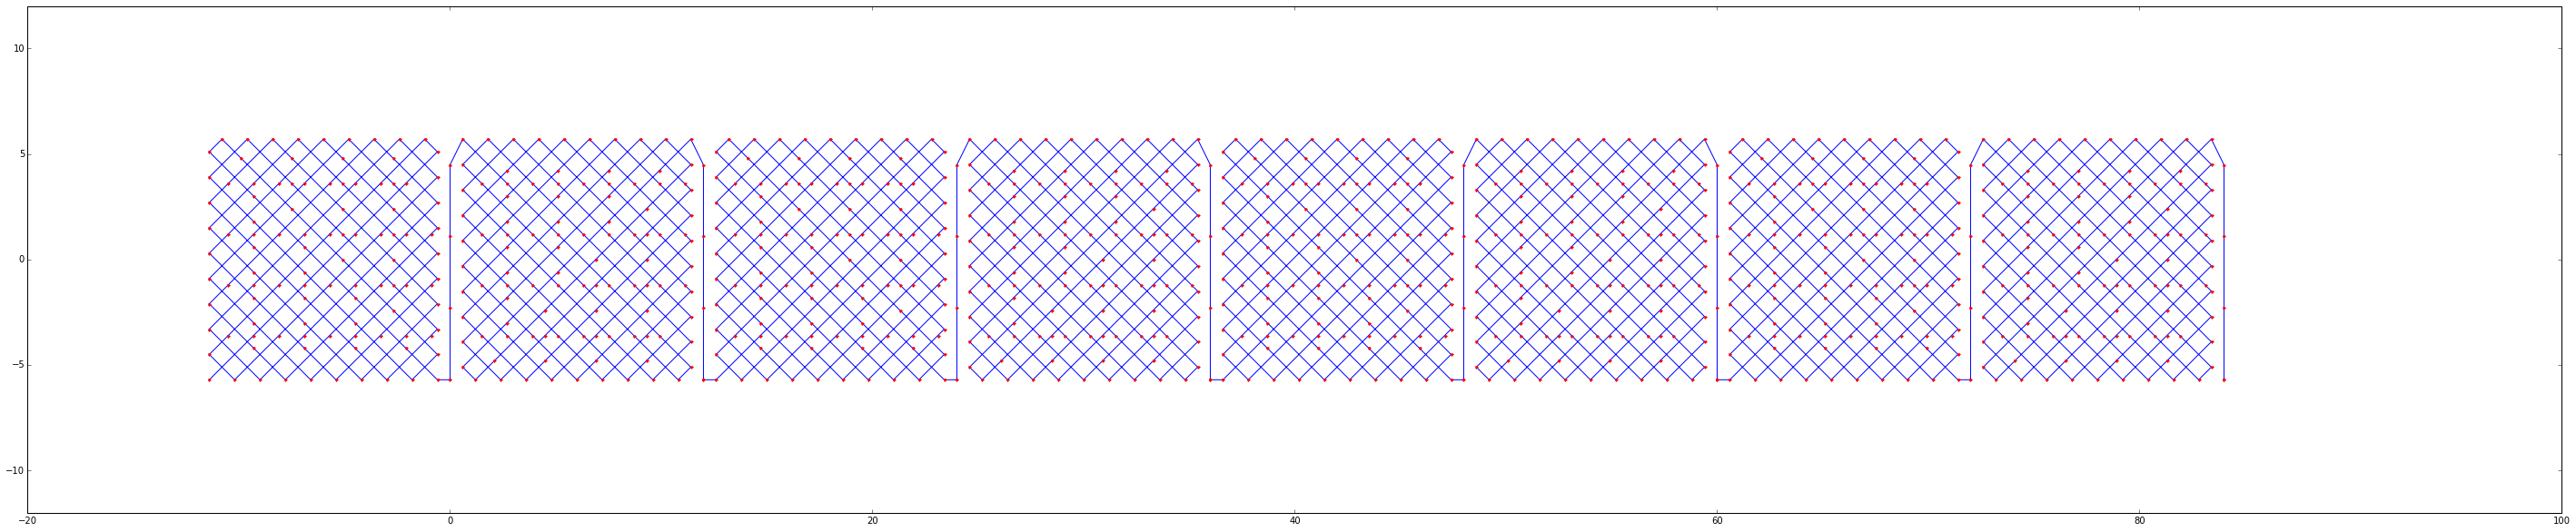

In [46]:
#Multiple coil pairs in a line
M=range(4) #Number of coil pairs to produce
Multicoilx=[]
Multicoily=[]
for m in M:
    Multicoilx=np.concatenate([Multicoilx,m*4*HalfSpacing+XsqPairx])
    Multicoilx=np.append(Multicoilx,m*4*HalfSpacing+np.max(XsqPairx))  #works if intercoil dist 10 mm or less
    Multicoily=np.concatenate([Multicoily,XsqPairy])
    Multicoily=np.append(Multicoily,XsqPairy[-1])

    
plt.figure(figsize=[50,10])
plt.plot(Multicoilx,Multicoily)
plt.axis('equal')
plt.hold('True')
plt.plot(Multicoilx,Multicoily,'r.')
pitch=(np.max(Multicoilx)-np.min(Multicoilx))/(2*(np.max(M)+1))
pitch

(15.0, 9.05096679918781)

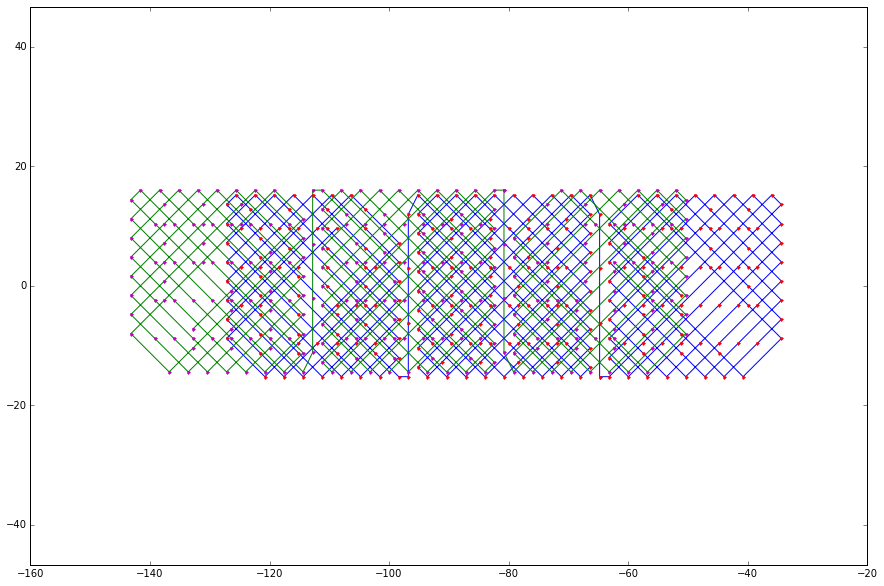

In [9]:
#Start and end need a few stitches or it's horrible trying to dig out the wire end
Leaderlength=30
Nleader=np.round(Leaderlength/stitchlength)
Leaderx=np.linspace(0.0,Leaderlength,Nleader)
Leadery=np.ones(Nleader)*np.min(XSqy)

#Put a leader on start and end of the multicoil strip, skipping first point to avoid intersecting
Devicex=np.concatenate([Leaderx[0:-1],Leaderlength+Multicoilx-np.min(Multicoilx)])
Devicex=np.concatenate([Devicex,Leaderlength-np.min(Multicoilx)+np.max(Multicoilx)+Leaderx[1:]])
Devicex=Devicex-(np.max(Devicex)+np.min(Devicex))/2 #center it
Devicey=np.concatenate([Leadery[0:-1],Multicoily])
Devicey=np.concatenate([Devicey,Leadery[1:]])

#Put another strip on the SAME side, offset just enough to avoid stabbing 
BackDevicex=-Devicex-Squarewidth/2-2*g/np.sqrt(2)
BackDevicey=-Devicey+g/2/np.sqrt(2)
UTurnx=np.arange(np.max(Devicex),np.max(BackDevicex),-1.0)
UTurny=np.linspace(np.min(Devicey),np.max(BackDevicey),len(UTurnx))
Devicex=np.append(Devicex,UTurnx[1:-1])
Devicey=np.append(Devicey,UTurny[1:-1])
Devicex=np.append(Devicex,BackDevicex)
Devicey=np.append(Devicey,BackDevicey)
plt.figure(figsize=[15,10])



plt.axis('equal')
plt.hold('True')
#plt.plot(Devicex,Devicey) #Plot entire device
#plt.plot(Devicex,Devicey,'r.')
#Close-up plots for inspection
plt.plot(Devicex [20:300],Devicey[20:300])
plt.plot(Devicex [-300:-20],Devicey[-300:-20],'g')
plt.plot(Devicex [-300:-20],Devicey[-300:-20],'m.')

plt.plot(Devicex [20:300] ,Devicey [20:300],'r.')

np.max(np.diff(Devicex)),np.max(np.diff(Devicey))#check biggest jump is <6mm


In [47]:
f=open('SqCoilInterleaved.csv','w')
for i in range(0,len(XsqPairx)):
    f.write("%.3f,%.3f\r\n"%(Devicex[i],Devicey[i]))
f.write("\r\n")